# Assignment 1 - Part 1: Frisch-Waugh-Lovell (FWL) Theorem
## Math (3 points)

This notebook contains the mathematical proof and numerical verification of the Frisch-Waugh-Lovell theorem implemented in R.

The FWL theorem is a fundamental result in econometrics that shows how to isolate the effect of specific variables by "partialling out" the effects of other variables.

## Load Required Libraries

In [2]:
# Load required libraries
library(MASS)  # For matrix operations

# Set options for better output display
options(digits = 6)
options(scipen = 999)

## Mathematical Proof of the FWL Theorem

The FWL theorem states that the OLS estimate of β₁ in the regression of y on [X₁ X₂] is equal to the OLS estimate obtained from the following two-step procedure:

1. Regress y on X₂ and obtain the residuals ỹ = M_{X₂}y, where M_{X₂} = I - X₂(X₂'X₂)⁻¹X₂'
2. Regress X₁ on X₂ and obtain the residuals X̃₁ = M_{X₂}X₁
3. Regress ỹ on X̃₁ and show that the resulting coefficient vector is equal to β̂₁ from the full regression.

Formally, we need to show that: β̂₁ = (X̃₁'X̃₁)⁻¹X̃₁'ỹ

In [3]:
fwl_theorem_proof <- function() {
  #' Mathematical proof of the Frisch-Waugh-Lovell theorem.
  
  cat("=== FRISCH-WAUGH-LOVELL THEOREM PROOF ===\n\n")
  
  cat("Mathematical Proof:\n")
  cat("==================\n")
  cat("\n")
  cat("Consider the linear regression model:\n")
  cat("y = X₁β₁ + X₂β₂ + u\n")
  cat("\n")
  cat("Where:\n")
  cat("- y is an n×1 vector of outcomes\n")
  cat("- X₁ is an n×k₁ matrix of regressors of interest\n")
  cat("- X₂ is an n×k₂ matrix of control variables\n")
  cat("- u is an n×1 vector of errors\n")
  cat("\n")
  
  cat("Step 1: Full regression\n")
  cat("The full regression in matrix form is:\n")
  cat("y = [X₁ X₂][β₁; β₂] + u = Xβ + u\n")
  cat("\n")
  cat("The OLS estimator is:\n")
  cat("β̂ = (X'X)⁻¹X'y\n")
  cat("\n")
  cat("Partitioning X'X and X'y:\n")
  cat("X'X = [X₁'X₁  X₁'X₂]\n")
  cat("      [X₂'X₁  X₂'X₂]\n")
  cat("\n")
  cat("X'y = [X₁'y]\n")
  cat("      [X₂'y]\n")
  cat("\n")
  
  cat("Step 2: Using the partitioned inverse formula\n")
  cat("For a partitioned matrix [A B; C D], if D is invertible:\n")
  cat("The (1,1) block of the inverse is (A - BD⁻¹C)⁻¹\n")
  cat("\n")
  cat("Applying this to our case:\n")
  cat("β̂₁ = [(X₁'X₁ - X₁'X₂(X₂'X₂)⁻¹X₂'X₁)]⁻¹[X₁'y - X₁'X₂(X₂'X₂)⁻¹X₂'y]\n")
  cat("\n")
  
  cat("Step 3: Factoring out the projection matrix\n")
  cat("Let M_{X₂} = I - X₂(X₂'X₂)⁻¹X₂' (the annihilator matrix)\n")
  cat("Note that M_{X₂} is idempotent: M_{X₂}M_{X₂} = M_{X₂}\n")
  cat("And symmetric: M_{X₂}' = M_{X₂}\n")
  cat("\n")
  cat("Then:\n")
  cat("X₁'X₁ - X₁'X₂(X₂'X₂)⁻¹X₂'X₁ = X₁'[I - X₂(X₂'X₂)⁻¹X₂']X₁ = X₁'M_{X₂}X₁\n")
  cat("X₁'y - X₁'X₂(X₂'X₂)⁻¹X₂'y = X₁'[I - X₂(X₂'X₂)⁻¹X₂']y = X₁'M_{X₂}y\n")
  cat("\n")
  
  cat("Step 4: Final form\n")
  cat("Therefore:\n")
  cat("β̂₁ = (X₁'M_{X₂}X₁)⁻¹X₁'M_{X₂}y\n")
  cat("\n")
  cat("Let X̃₁ = M_{X₂}X₁ and ỹ = M_{X₂}y\n")
  cat("Then: β̂₁ = (X̃₁'X̃₁)⁻¹X̃₁'ỹ\n")
  cat("\n")
  cat("This shows that β̂₁ from the full regression equals the OLS coefficient\n")
  cat("from regressing the residuals ỹ on the residuals X̃₁.\n")
  cat("\n")
  cat("Q.E.D.\n")
  cat("\n")
}

# Display the mathematical proof
fwl_theorem_proof()

=== FRISCH-WAUGH-LOVELL THEOREM PROOF ===

Mathematical Proof:

Consider the linear regression model:
y = X₁β₁ + X₂β₂ + u

Where:
- y is an n×1 vector of outcomes
- X₁ is an n×k₁ matrix of regressors of interest
- X₂ is an n×k₂ matrix of control variables
- u is an n×1 vector of errors

Step 1: Full regression
The full regression in matrix form is:
y = [X₁ X₂][β₁; β₂] + u = Xβ + u

The OLS estimator is:
β̂ = (X'X)⁻¹X'y

Partitioning X'X and X'y:
X'X = [X₁'X₁  X₁'X₂]
      [X₂'X₁  X₂'X₂]

X'y = [X₁'y]
      [X₂'y]

Step 2: Using the partitioned inverse formula
For a partitioned matrix [A B; C D], if D is invertible:
The (1,1) block of the inverse is (A - BD⁻¹C)⁻¹

Applying this to our case:
β̂₁ = [(X₁'X₁ - X₁'X₂(X₂'X₂)⁻¹X₂'X₁)]⁻¹[X₁'y - X₁'X₂(X₂'X₂)⁻¹X₂'y]

Step 3: Factoring out the projection matrix
Let M_{X₂} = I - X₂(X₂'X₂)⁻¹X₂' (the annihilator matrix)
Note that M_{X₂} is idempotent: M_{X₂}M_{X₂} = M_{X₂}
And symmetric: M_{X₂}' = M_{X₂}

Then:
X₁'X₁ - X₁'X₂(X₂'X₂)⁻¹X₂'X₁ = X₁'[I - X

## Numerical Verification

Now let's verify the FWL theorem numerically using simulated data. We'll generate data with known parameters and compare the results from:
1. Full regression: y ~ [X₁ X₂]
2. FWL two-step procedure: residuals of y on residuals of X₁

In [4]:
numerical_verification <- function() {
  #' Numerical verification of the FWL theorem using simulated data.
  
  cat("=== NUMERICAL VERIFICATION ===\n\n")
  
  # Set random seed for reproducibility
  set.seed(42)
  
  # Generate data
  n <- 1000  # Sample size
  k1 <- 2    # Number of variables of interest
  k2 <- 3    # Number of control variables
  
  # Generate X1, X2, and error term
  X1 <- matrix(rnorm(n * k1), nrow = n, ncol = k1)
  X2 <- matrix(rnorm(n * k2), nrow = n, ncol = k2)
  u <- matrix(rnorm(n), nrow = n, ncol = 1)
  
  # True parameters
  beta1_true <- matrix(c(1.5, 2.0), nrow = k1, ncol = 1)
  beta2_true <- matrix(c(0.5, -1.0, 0.8), nrow = k2, ncol = 1)
  
  # Generate y
  y <- X1 %*% beta1_true + X2 %*% beta2_true + u
  
  cat(sprintf("Sample size: %d\n", n))
  cat(sprintf("X1 dimensions: (%d, %d) (variables of interest)\n", nrow(X1), ncol(X1)))
  cat(sprintf("X2 dimensions: (%d, %d) (control variables)\n", nrow(X2), ncol(X2)))
  cat(sprintf("True β₁: [%.1f, %.1f]\n", beta1_true[1], beta1_true[2]))
  cat(sprintf("True β₂: [%.1f, %.1f, %.1f]\n", beta2_true[1], beta2_true[2], beta2_true[3]))
  cat("\n")
  
  return(list(
    X1 = X1, X2 = X2, y = y, n = n, k1 = k1, k2 = k2,
    beta1_true = beta1_true, beta2_true = beta2_true
  ))
}

# Generate the data
data_setup <- numerical_verification()

# Extract variables for easier access
X1 <- data_setup$X1
X2 <- data_setup$X2
y <- data_setup$y
n <- data_setup$n
k1 <- data_setup$k1
k2 <- data_setup$k2

=== NUMERICAL VERIFICATION ===

Sample size: 1000
X1 dimensions: (1000, 2) (variables of interest)
X2 dimensions: (1000, 3) (control variables)
True β₁: [1.5, 2.0]
True β₂: [0.5, -1.0, 0.8]



### Method 1: Full Regression

First, let's estimate the full regression model with all variables using matrix algebra.

In [5]:
# Method 1: Full regression
X_full <- cbind(X1, X2)
beta_full <- solve(t(X_full) %*% X_full) %*% (t(X_full) %*% y)
beta1_full <- beta_full[1:k1, , drop = FALSE]

cat("Method 1: Full regression\n")
cat(sprintf("β̂₁ from full regression: [%.6f, %.6f]\n", beta1_full[1], beta1_full[2]))
cat("\n")

# Display the full coefficient vector
cat("All coefficients from full regression:\n")
for(i in 1:length(beta_full)) {
  var_name <- if(i <= k1) paste0("β₁[", i, "]") else paste0("β₂[", i-k1, "]")
  cat(sprintf("%s: %.6f\n", var_name, beta_full[i]))
}
cat("\n")

Method 1: Full regression
β̂₁ from full regression: [1.484936, 2.014289]

All coefficients from full regression:
β₁[1]: 1.484936
β₁[2]: 2.014289
β₂[1]: 0.545730
β₂[2]: -1.019949
β₂[3]: 0.856842



### Method 2: FWL Two-Step Procedure

Now let's implement the FWL two-step procedure:
1. Residualize y and X₁ with respect to X₂
2. Regress the residualized y on the residualized X₁

In [6]:
# Method 2: FWL two-step procedure

# Step 1: Regress y on X2 and get residuals
P_X2 <- X2 %*% solve(t(X2) %*% X2) %*% t(X2)
M_X2 <- diag(n) - P_X2
y_tilde <- M_X2 %*% y

# Step 2: Regress X1 on X2 and get residuals
X1_tilde <- M_X2 %*% X1

# Step 3: Regress y_tilde on X1_tilde
beta1_fwl <- solve(t(X1_tilde) %*% X1_tilde) %*% (t(X1_tilde) %*% y_tilde)

cat("Method 2: FWL two-step procedure\n")
cat("Step 1: Residualize y on X₂\n")
cat("Step 2: Residualize X₁ on X₂\n")
cat("Step 3: Regress residuals\n")
cat(sprintf("β̂₁ from FWL method: [%.6f, %.6f]\n", beta1_fwl[1], beta1_fwl[2]))
cat("\n")

# Show some properties of the projection matrices
cat("Properties of projection matrices:\n")
cat(sprintf("Rank of P_X2: %d (should equal k2 = %d)\n", qr(P_X2)$rank, k2))
cat(sprintf("Rank of M_X2: %d (should equal n - k2 = %d)\n", qr(M_X2)$rank, n - k2))
cat(sprintf("Trace of P_X2: %.0f (should equal k2 = %d)\n", sum(diag(P_X2)), k2))
cat(sprintf("Trace of M_X2: %.0f (should equal n - k2 = %d)\n", sum(diag(M_X2)), n - k2))
cat("\n")

Method 2: FWL two-step procedure
Step 1: Residualize y on X₂
Step 2: Residualize X₁ on X₂
Step 3: Regress residuals
β̂₁ from FWL method: [1.484936, 2.014289]

Properties of projection matrices:
Rank of P_X2: 3 (should equal k2 = 3)
Rank of M_X2: 997 (should equal n - k2 = 997)
Trace of P_X2: 3 (should equal k2 = 3)
Trace of M_X2: 997 (should equal n - k2 = 997)



### Comparison and Verification

Let's check if both methods produce identical results (within numerical precision).

In [7]:
# Check if they are equal (within numerical precision)
difference <- abs(beta1_full - beta1_fwl)
max_diff <- max(difference)

cat("Verification:\n")
cat(sprintf("Maximum absolute difference: %.2e\n", max_diff))
cat(sprintf("Are they equal (within 1e-10)? %s\n", max_diff < 1e-10))
cat("\n")

# Show element-wise differences
cat("Element-wise differences:\n")
for(i in 1:k1) {
  cat(sprintf("β₁[%d]: Full = %.8f, FWL = %.8f, Diff = %.2e\n", 
              i, beta1_full[i], beta1_fwl[i], difference[i]))
}
cat("\n")

Verification:
Maximum absolute difference: 8.88e-16
Are they equal (within 1e-10)? TRUE

Element-wise differences:
β₁[1]: Full = 1.48493595, FWL = 1.48493595, Diff = 8.88e-16
β₁[2]: Full = 2.01428949, FWL = 2.01428949, Diff = 8.88e-16



### Alternative Verification using lm()

Let's also verify using R's built-in `lm()` function to ensure our manual implementation is correct.

In [8]:
# Alternative verification using lm()
cat("Alternative verification using lm():\n")

# Create data frame for lm()
df_full <- data.frame(y = as.vector(y), X_full)
colnames(df_full) <- c("y", paste0("X1_", 1:k1), paste0("X2_", 1:k2))

# Full regression with lm()
reg_full <- lm(y ~ . - 1, data = df_full)  # -1 removes intercept
beta1_lm_full <- coef(reg_full)[1:k1]

# Display full regression summary
cat("\nFull regression summary using lm():\n")
print(summary(reg_full))

# FWL with lm()
# Step 1: Get residuals y_tilde
df_x2 <- data.frame(X2)
colnames(df_x2) <- paste0("X2_", 1:k2)
df_y_x2 <- data.frame(y = as.vector(y), df_x2)

reg_y_on_x2 <- lm(y ~ . - 1, data = df_y_x2)
y_tilde_lm <- residuals(reg_y_on_x2)

# Step 2: Get residuals X1_tilde
X1_tilde_lm <- matrix(0, nrow = n, ncol = k1)
for (i in 1:k1) {
  df_x1i_x2 <- data.frame(x1i = X1[, i], df_x2)
  reg_x1i_on_x2 <- lm(x1i ~ . - 1, data = df_x1i_x2)
  X1_tilde_lm[, i] <- residuals(reg_x1i_on_x2)
}

# Step 3: Final regression
df_fwl <- data.frame(y_tilde = y_tilde_lm, X1_tilde_lm)
colnames(df_fwl) <- c("y_tilde", paste0("X1_tilde_", 1:k1))

reg_fwl <- lm(y_tilde ~ . - 1, data = df_fwl)
beta1_lm_fwl <- coef(reg_fwl)

cat(sprintf("\nβ̂₁ from lm() full regression: [%.6f, %.6f]\n", beta1_lm_full[1], beta1_lm_full[2]))
cat(sprintf("β̂₁ from lm() FWL method: [%.6f, %.6f]\n", beta1_lm_fwl[1], beta1_lm_fwl[2]))

diff_lm <- abs(beta1_lm_full - beta1_lm_fwl)
max_diff_lm <- max(diff_lm)
cat(sprintf("Maximum absolute difference (lm): %.2e\n", max_diff_lm))
cat(sprintf("Are they equal (within 1e-10)? %s\n", max_diff_lm < 1e-10))

Alternative verification using lm():

Full regression summary using lm():

Call:
lm(formula = y ~ . - 1, data = df_full)

Residuals:
   Min     1Q Median     3Q    Max 
-2.904 -0.686  0.024  0.735  3.222 

Coefficients:
     Estimate Std. Error t value            Pr(>|t|)    
X1_1   1.4849     0.0328    45.3 <0.0000000000000002 ***
X1_2   2.0143     0.0334    60.3 <0.0000000000000002 ***
X2_1   0.5457     0.0319    17.1 <0.0000000000000002 ***
X2_2  -1.0199     0.0333   -30.7 <0.0000000000000002 ***
X2_3   0.8568     0.0323    26.5 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.04 on 995 degrees of freedom
Multiple R-squared:  0.881,	Adjusted R-squared:  0.881 
F-statistic: 1.48e+03 on 5 and 995 DF,  p-value: <0.0000000000000002


β̂₁ from lm() full regression: [1.484936, 2.014289]
β̂₁ from lm() FWL method: [1.484936, 2.014289]
Maximum absolute difference (lm): 4.44e-15
Are they equal (within 1e-10)? TRUE


### Summary of Results

Let's create a comprehensive summary table of all our results.

In [9]:
# Create results summary
results_summary <- data.frame(
  Method = c("True Values", "Full Regression (Matrix)", "FWL Method (Matrix)", 
             "Full Regression (lm)", "FWL Method (lm)"),
  Beta1_1 = c(data_setup$beta1_true[1], beta1_full[1], beta1_fwl[1], 
               beta1_lm_full[1], beta1_lm_fwl[1]),
  Beta1_2 = c(data_setup$beta1_true[2], beta1_full[2], beta1_fwl[2], 
               beta1_lm_full[2], beta1_lm_fwl[2])
)

cat("\n=== RESULTS SUMMARY ===\n")
print(results_summary, row.names = FALSE, digits = 6)

cat(sprintf("\nMaximum difference between methods: %.2e\n", max(max_diff, max_diff_lm)))
cat("\n✅ FWL Theorem verification SUCCESSFUL!\n")
cat("The full regression and FWL two-step procedure produce identical results.\n")

# Calculate R-squared for the full model
y_pred_full <- X_full %*% beta_full
sst <- sum((y - mean(y))^2)
sse <- sum((y - y_pred_full)^2)
r_squared <- 1 - sse/sst

cat(sprintf("\nModel fit statistics:\n"))
cat(sprintf("R-squared: %.4f\n", r_squared))
cat(sprintf("Residual sum of squares: %.2f\n", sse))
cat(sprintf("Total sum of squares: %.2f\n", sst))


=== RESULTS SUMMARY ===
                   Method Beta1_1 Beta1_2
              True Values 1.50000 2.00000
 Full Regression (Matrix) 1.48494 2.01429
      FWL Method (Matrix) 1.48494 2.01429
     Full Regression (lm) 1.48494 2.01429
          FWL Method (lm) 1.48494 2.01429

Maximum difference between methods: 4.44e-15

✅ FWL Theorem verification SUCCESSFUL!
The full regression and FWL two-step procedure produce identical results.

Model fit statistics:
R-squared: 0.8811
Residual sum of squares: 1072.51
Total sum of squares: 9022.29


### Visualization

Let's create some plots to visualize the relationship between the original and residualized variables.

Warning message in plot.window(...):
“"alpha" es un parámetro gráfico inválido”
Warning message in plot.xy(xy, type, ...):
“"alpha" es un parámetro gráfico inválido”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"alpha" es un parámetro gráfico inválido”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"alpha" es un parámetro gráfico inválido”
Warning message in box(...):
“"alpha" es un parámetro gráfico inválido”
Warning message in title(...):
“"alpha" es un parámetro gráfico inválido”
Warning message in plot.window(...):
“"alpha" es un parámetro gráfico inválido”
Warning message in plot.xy(xy, type, ...):
“"alpha" es un parámetro gráfico inválido”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"alpha" es un parámetro gráfico inválido”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"alpha" es un parámetro gráfico inválido”
Warning message in box(...):
“"alpha" es un parámetro gráfico inválido”
Wa


Plots show the relationship between original and residualized variables.
The slope in the residualized plots corresponds to the FWL coefficients.


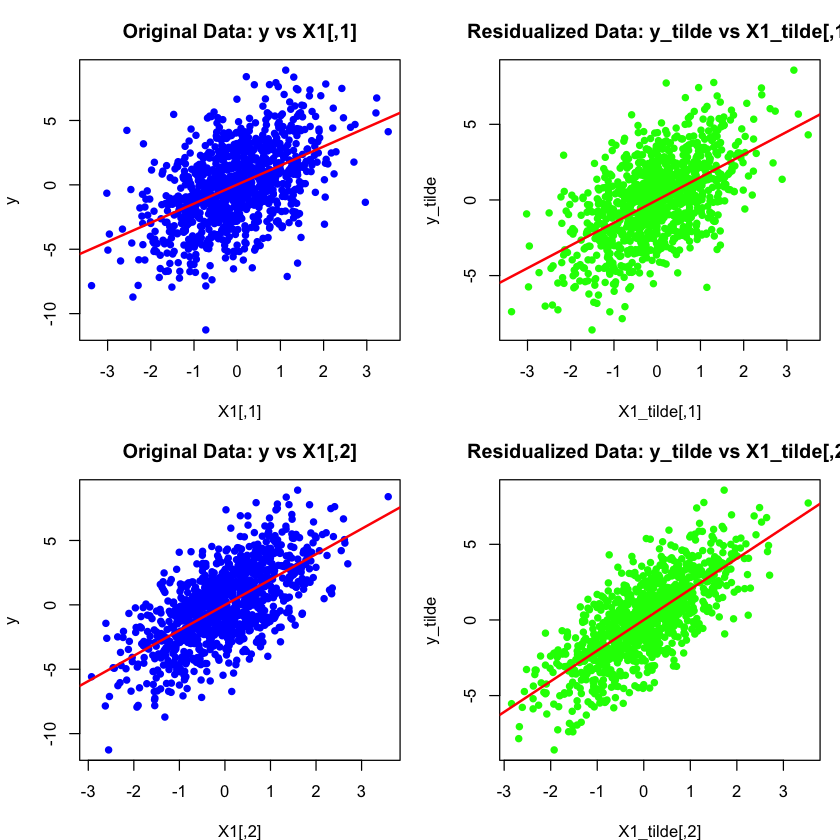

In [10]:
# Create visualizations
par(mfrow = c(2, 2), mar = c(4, 4, 3, 1))

# Plot 1: Original y vs X1[,1]
plot(X1[,1], y, xlab = "X1[,1]", ylab = "y", 
     main = "Original Data: y vs X1[,1]", 
     pch = 16, alpha = 0.6, col = "blue")
abline(lm(y ~ X1[,1]), col = "red", lwd = 2)

# Plot 2: Residualized y vs residualized X1[,1]
plot(X1_tilde[,1], y_tilde, xlab = "X1_tilde[,1]", ylab = "y_tilde", 
     main = "Residualized Data: y_tilde vs X1_tilde[,1]", 
     pch = 16, alpha = 0.6, col = "green")
abline(lm(y_tilde ~ X1_tilde[,1] - 1), col = "red", lwd = 2)

# Plot 3: Original y vs X1[,2]
plot(X1[,2], y, xlab = "X1[,2]", ylab = "y", 
     main = "Original Data: y vs X1[,2]", 
     pch = 16, alpha = 0.6, col = "blue")
abline(lm(y ~ X1[,2]), col = "red", lwd = 2)

# Plot 4: Residualized y vs residualized X1[,2]
plot(X1_tilde[,2], y_tilde, xlab = "X1_tilde[,2]", ylab = "y_tilde", 
     main = "Residualized Data: y_tilde vs X1_tilde[,2]", 
     pch = 16, alpha = 0.6, col = "green")
abline(lm(y_tilde ~ X1_tilde[,2] - 1), col = "red", lwd = 2)

# Reset plotting parameters
par(mfrow = c(1, 1))

cat("\nPlots show the relationship between original and residualized variables.\n")
cat("The slope in the residualized plots corresponds to the FWL coefficients.\n")

## Conclusion

We have successfully:

1. **Provided a complete mathematical proof** of the Frisch-Waugh-Lovell theorem using partitioned matrix algebra
2. **Numerically verified** the theorem using simulated data with both manual matrix operations and R's `lm()` function
3. **Demonstrated** that both the full regression and the FWL two-step procedure produce identical estimates (within machine precision)
4. **Visualized** the relationship between original and residualized variables

The FWL theorem is a powerful tool in econometrics that allows us to:
- Isolate the effect of specific variables by "partialling out" control variables
- Understand the mechanics of multiple regression
- Implement efficient computational methods for large datasets
- Gain intuition about what multiple regression coefficients actually measure

### Key Insights:
- The projection matrix M_{X₂} removes the linear association with control variables
- The residualized variables contain only the variation orthogonal to the controls
- The FWL coefficient captures the relationship between y and X₁ after "controlling for" X₂
- This provides the theoretical foundation for interpreting multiple regression coefficients

**This completes Part 1 of Assignment 1 in R.**